In [133]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
# read the dataset using pandas
data = pd.read_csv('Salary_Data.csv')

In [135]:
# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [136]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [137]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


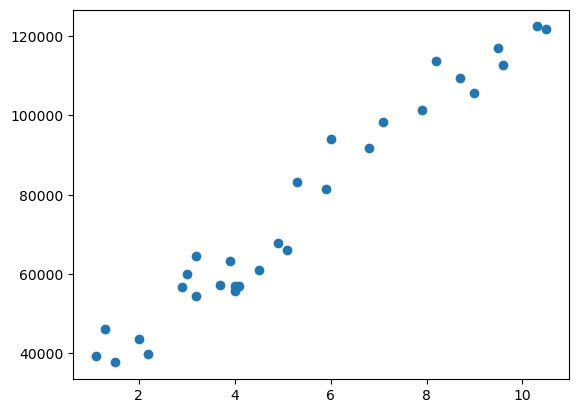

In [138]:
# These Plots help to explain the values and how they are scattered

# Plot a scatter plot 
import matplotlib.pyplot as plt
x = np.array(data['YearsExperience'])
y = np.array(data['Salary'])
plot = plt.scatter(x,y)
plt.show()

In [139]:
# Cooking the data
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [140]:
# Cooking the data
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [141]:
# the train-test ratio depends on the size of the data
data.shape
# therefore according to common rule-of-thumb guidelines, we're gonna go with 80:20 train:test

(30, 2)

In [142]:
# Split the data for train and test (80% for training)
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1] # all rows of feature columns
y = data.iloc[:,-1] # all rows of the target column 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [143]:
print(x_train.shape)

(24, 1)


In [144]:
# Create new axis for x column
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [145]:
# Importing Linear Regression model from scikit learn
from sklearn import linear_model


In [146]:
# Fitting the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [147]:
# Predicting the Salary for the Test values
y_pred=reg.predict(x_test)
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


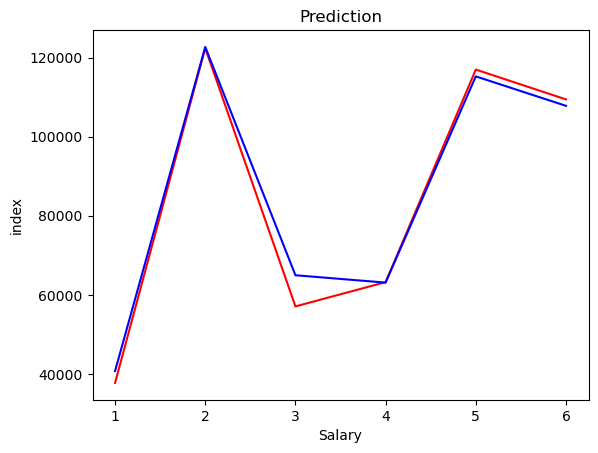

In [148]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

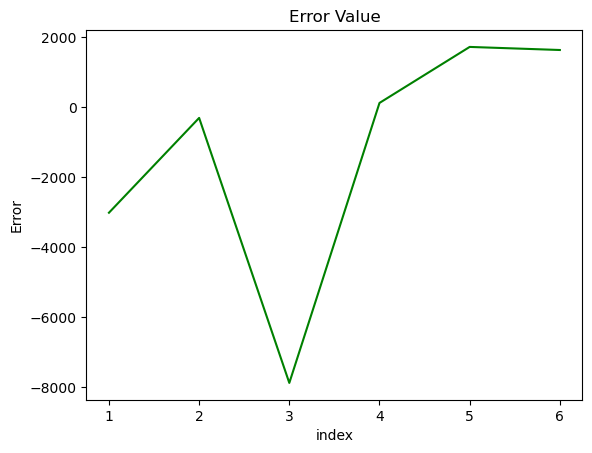

In [149]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [150]:
# Importing r2_score and mean_squared_error for the evaluation of the model
from sklearn.metrics import r2_score, mean_squared_error


In [151]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)

12823412.298126562


In [152]:
# Calculate R square value
r2 = r2_score(y_test, y_pred)
print(r2)

0.988169515729126


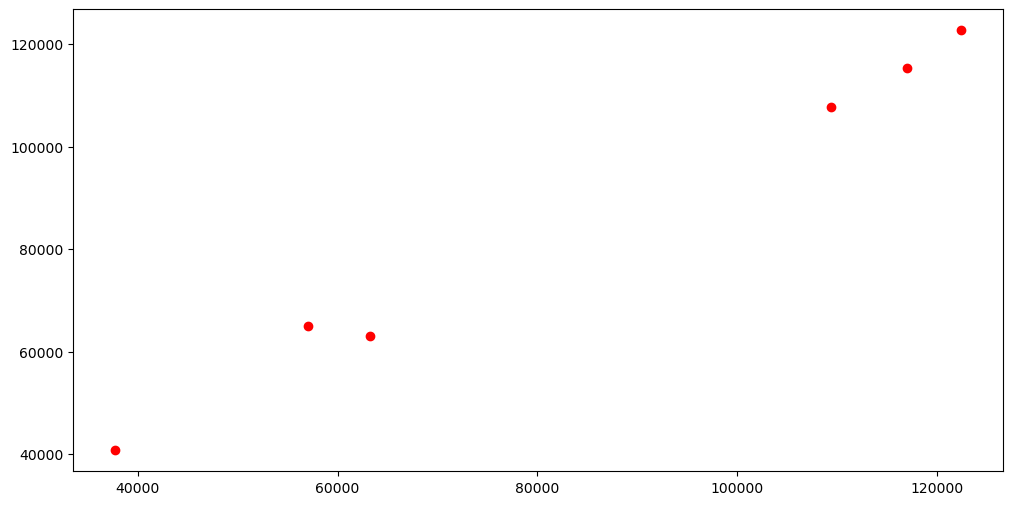

In [153]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [154]:
# Intecept and coeff of the line
print('Intercept of the model:',reg.intercept_)
print('Coefficient of the line:',reg.coef_)

Intercept of the model: 26780.099150628186
Coefficient of the line: [9312.57512673]


c:\Users\sherr\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


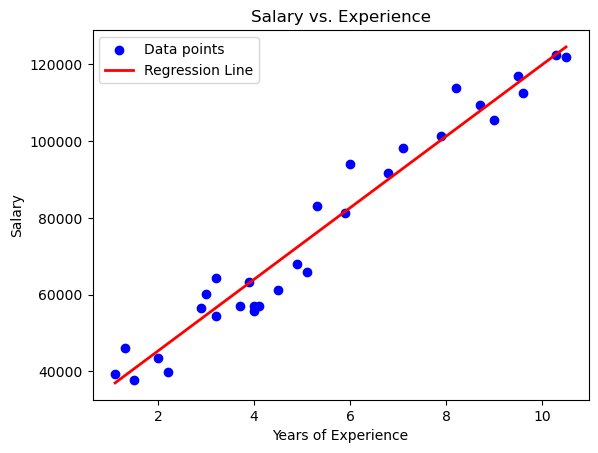

In [156]:
plt.scatter(x, y, color='blue', label='Data points')

plt.plot(x, reg.predict(x), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Experience')
plt.legend()

plt.show()